In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Cel
Zbudowanie modelu klasyfikującego skoliozę - jako tako udany

# Ładowanie Danych

In [7]:
import os
import cv2
import scripts.image_label_loader as iml
import numpy as np

data_dir = '../Datasets/X-Ray/high_res'
train_images, train_labels = iml.load_images_and_labels(data_dir, 'train')
valid_images, valid_labels = iml.load_images_and_labels(data_dir, 'valid')
test_images, test_labels = iml.load_images_and_labels(data_dir, 'test')

print(f'Train images: {len(train_images)}, Train labels: {len(train_labels)}')
print(f'Train shape {train_images[0].shape}')
print(f'Valid images: {len(valid_images)}, Valid labels: {len(valid_labels)}')
print(f'Test images: {len(test_images)}, Test labels: {len(test_labels)}')

train_images = np.array(train_images).astype(np.float32)
train_labels = np.array(train_labels).astype(np.float32)
test_images = np.array(test_images).astype(np.float32)
test_labels = np.array(test_labels).astype(np.float32)
valid_images = np.array(valid_images).astype(np.float32)
valid_labels = np.array(valid_labels).astype(np.float32)

train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

Train images: 859, Train labels: 859
Train shape (300, 300, 3)
Valid images: 100, Valid labels: 100
Test images: 98, Test labels: 98


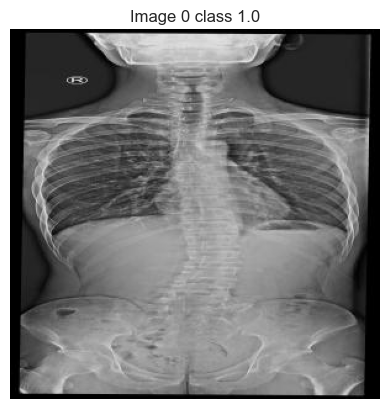

In [8]:
for i in range(0, 1):
    plt.imshow(train_images[i])
    plt.title(f'Image {i} class {train_labels[i]}') 
    plt.axis('off')  
    plt.show()  

# Tworzenie Modelu

In [9]:
import tensorflow
import keras
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc

In [12]:
from keras.utils import plot_model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(300, 300, 3)),  
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(64, activation='relu'),
    Dropout(0.5),  
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, epochs=15, validation_data=(valid_images, valid_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 240s 9s/step - accuracy: 0.7721 - loss: 0.5086 - val_accuracy: 0.8800 - val_loss: 0.2925
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 182s 7s/step - accuracy: 0.8608 - loss: 0.3601 - val_accuracy: 0.8800 - val_loss: 0.2656
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 283s 11s/step - accuracy: 0.8348 - loss: 0.3496 - val_accuracy: 0.8800 - val_loss: 0.3409
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 249s 9s/step - accuracy: 0.8645 - loss: 0.2789 - val_accuracy: 0.8800 - val_loss: 0.2241
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 240s 9s/step - accuracy: 0.8592 - loss: 0.2624 - val_accuracy: 0.8800 - val_loss: 0.2051
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 221s 8s/step - accuracy: 0.8508 - loss: 0.2524 - val_accuracy: 0.8800 - val_loss: 0.2174
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 241s 9s/step - accuracy: 0.8702 - loss: 0.2274 - val_accuracy: 0.8800 - val_loss: 0.2134
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 179s 7s/step - accuracy: 0.8700 - loss: 0.2604 - val_accuracy: 0.8800 - 

# Statystyki Uczenia

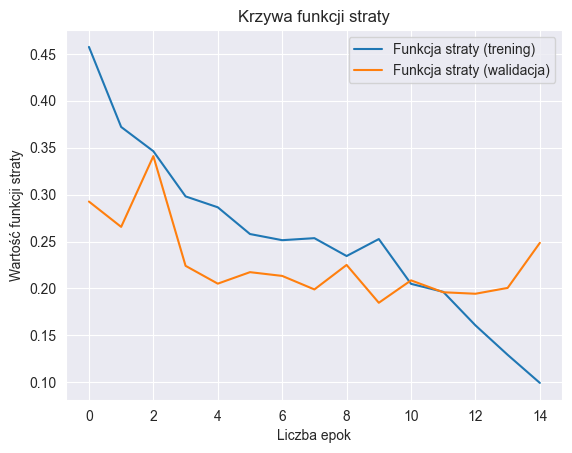

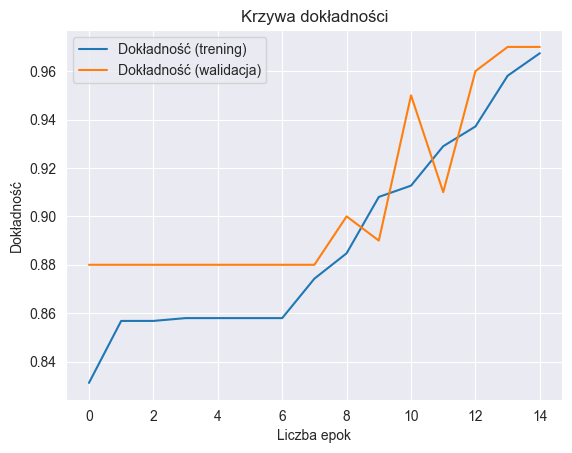

In [14]:
plt.plot(history.history['loss'], label='Funkcja straty (trening)')
plt.plot(history.history['val_loss'], label='Funkcja straty (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Wartość funkcji straty')
plt.legend()
plt.title('Krzywa funkcji straty')
plt.show()
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.xlabel('Liczba epok')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Krzywa dokładności')
plt.show()

In [15]:
print(f"Wymiary testowych danych: {test_images.shape}\n")
pred_label = model.predict(test_images)
print(f"Dane odpowiedzi prosto z modelu: {pred_label}\n")
pred_label = np.where(pred_label > 0.5, 1, 0)
print(f"Dane po konwersji: {pred_label}\n")

Wymiary testowych danych: (98, 300, 300, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 846ms/step
Dane odpowiedzi prosto z modelu: [[0.9993034 ]
 [1.        ]
 [0.9998806 ]
 [0.9999999 ]
 [0.9997485 ]
 [0.999985  ]
 [1.        ]
 [0.99886465]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.9999955 ]
 [0.9999985 ]
 [1.        ]
 [0.9862177 ]
 [1.        ]
 [0.99999213]
 [0.9993555 ]
 [0.99999976]
 [0.99961406]
 [0.98421425]
 [0.9997562 ]
 [1.        ]
 [0.32185033]
 [0.9999998 ]
 [0.9999997 ]
 [0.9891921 ]
 [0.9924751 ]
 [0.99999875]
 [0.99999535]
 [0.9765692 ]
 [1.        ]
 [0.9989575 ]
 [0.9967622 ]
 [0.16074403]
 [0.11288808]
 [0.07242633]
 [0.1428771 ]
 [0.07594851]
 [0.17587698]
 [0.17587698]
 [0.19579557]
 [0.05881508]
 [0.19905345]
 [0.2462499 ]
 [0.140277  ]
 [0.14852697]
 [0.14852697]
 [0.05891044]
 [0.08721302]
 [0.28262225]
 [0.16263098]
 [0.05704738]
 [0.14229468]
 [0.22645354]
 [0.09149222]
 [0.17632976]
 [0.08366193]
 [0.20993206]
 [0.17435242]
 [0.17435242]
 [0.00417257]
 [0.15721542]
 [

[29 60]


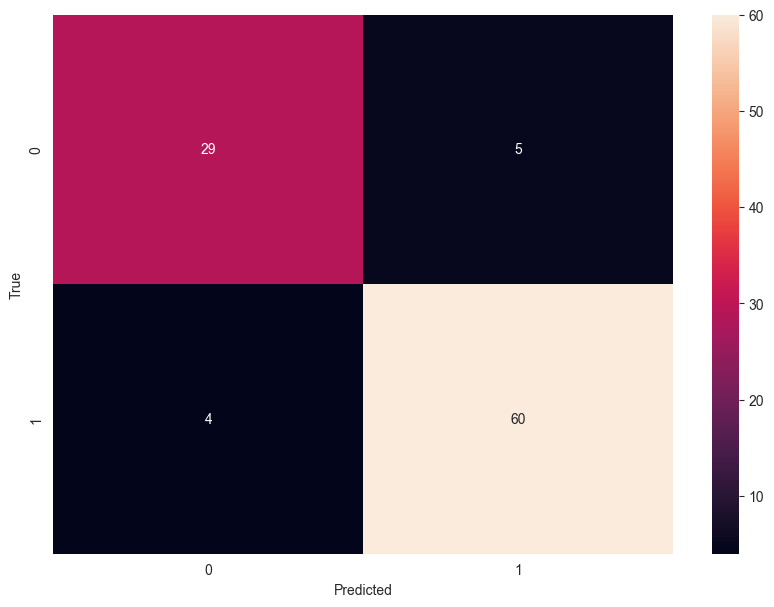

In [16]:
# Obliczenie confusion matrix
cm = confusion_matrix(pred_label, test_labels)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(2)], columns = [i for i in range(2)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
import pickle

with open('../model/model_2.pkl', 'wb') as f:
    pickle.dump(model, f)